In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
directory = "data_quick_draw"
files = os.listdir(directory)
images = np.zeros((0, 28, 28))
targets = np.array([])
classes = []

for num in range(len(files)):
    name_file = files[num]
    classes.append(name_file.replace('full-numpy_bitmap-', '').replace('.npy', ''))
    draws = np.load(os.path.join(directory, name_file))
    draws = draws[:20000]
    images = np.concatenate([images, np.invert(draws.reshape(-1, 28, 28))])
    targets = np.concatenate([targets, [num] * draws.shape[0]])

In [3]:
indexes = np.arange(targets.shape[0])
np.random.shuffle(indexes)
images = images[indexes]
targets = targets[indexes]

In [4]:
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.33, random_state=0)
images_train.shape

(134000, 28, 28)

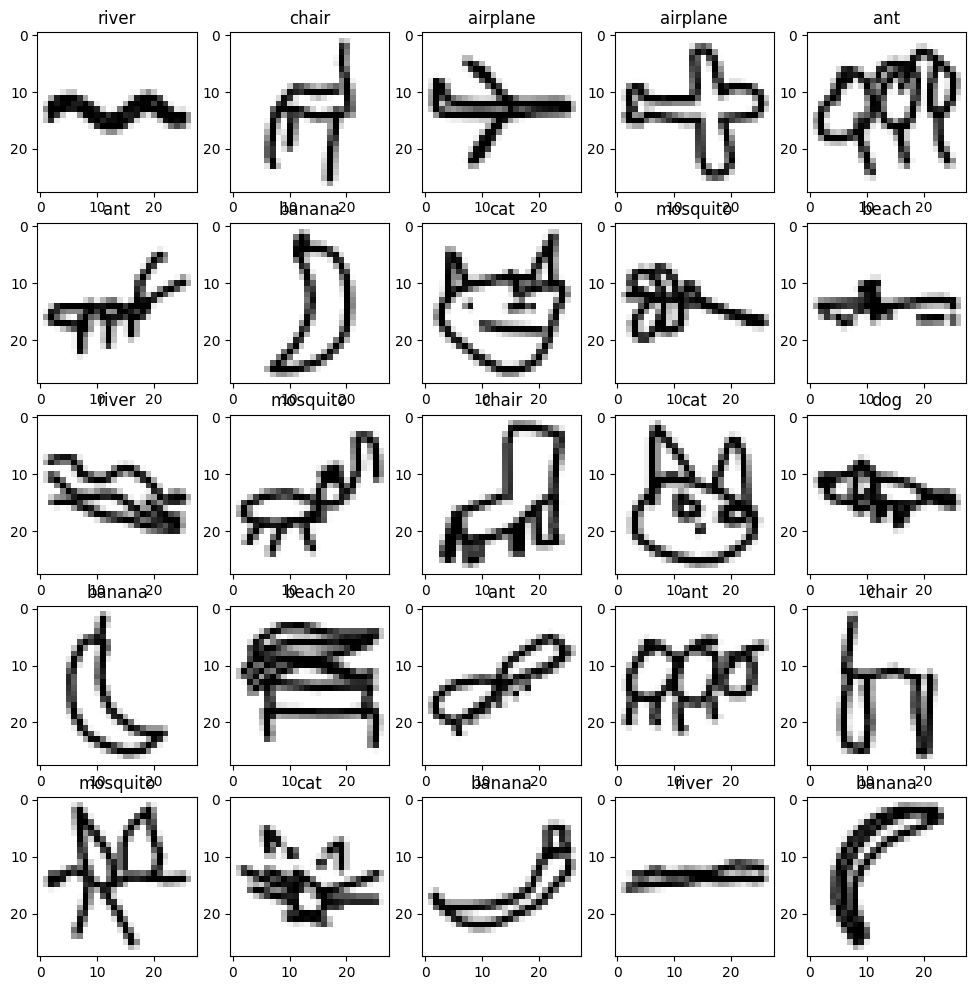

In [5]:
fig = plt.figure(figsize=(12, 12))
rows = 5 ; colums = 5

for x in range(1, rows * colums + 1):
    index = np.random.randint(len(images_train))
    img = images[index]
    fig.add_subplot(rows, colums, x)
    plt.title(classes[int(targets[index])])
    plt.imshow(img, cmap='gray')

## Normalisation

In [6]:
# scalar = StandardScaler()
# images_train = images_train.reshape(-1, 28 * 28)
# images_test = images_test.reshape(-1, 28 * 28)

# images_train = scalar.fit_transform(images_train) 
# images_test = scalar.fit_transform(images_test)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu')) 
# filter : nombre de noyaux de convolution (kernel) et kernel_size : taille du noyau (ex: 3x3)
# cela permet de détecter des motifs dans l'image
# on les rétrécit pour avoir plus de précision (détails)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary() 
# taille 24x24x16 car on a 16 noyaux de convolution et on a rétréci l'image de 4 pixels (la formule du cours)
# Lc = (Lp - F + 2P) / S + 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,370 (1.77 MB)

 Trainable params: 463,370 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
batch_size = 512
hidden_units = 256
dropout = 0.45
history = model.fit(images_train.reshape(-1, 28, 28, 1), targets_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.1281 - loss: 8.3210 - val_accuracy: 0.5101 - val_loss: 1.4559
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.4982 - loss: 1.4784 - val_accuracy: 0.6743 - val_loss: 1.0131
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.6312 - loss: 1.1153 - val_accuracy: 0.7297 - val_loss: 0.8538
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.6979 - loss: 0.9358 - val_accuracy: 0.7724 - val_loss: 0.7087
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.7378 - loss: 0.8117 - val_accuracy: 0.7879 - val_loss: 0.6571
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.7680 - loss: 0.7243 - val_accuracy: 0.8016 - val_loss: 0.6146
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.7810 - loss: 0.6794 - val_accuracy: 0.8149 - val_loss: 0.5810
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.7992 - loss: 0.6236 - 

<Axes: >

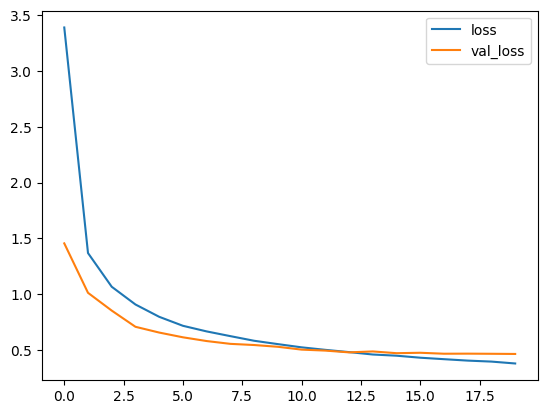

In [11]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

<Axes: >

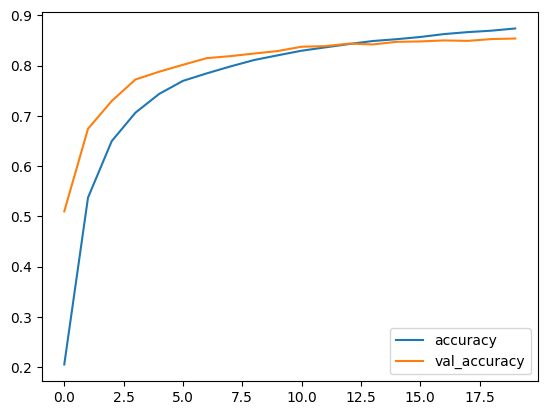

In [12]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [25]:
targets_pred = model.predict(images_test.reshape(-1, 28, 28, 1))

2063/2063 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


<Axes: >

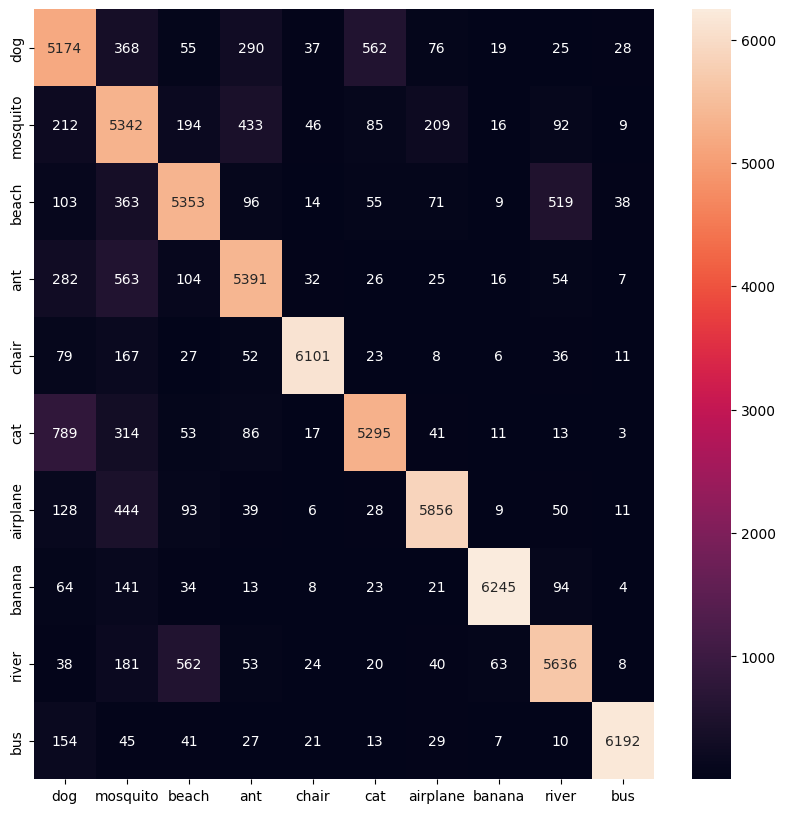

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(targets_test, targets_pred.argmax(axis=1)), annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [28]:
targets_pr = targets_pred.argmax(axis=1)
y_test_val = targets_test.astype(int)

df = pd.DataFrame(targets_pr, columns=['y_pred'])
df['y_test'] = y_test_val

total = 0
for i in range(10):
    val = df[(df['y_pred'] != i) & (df['y_test'] == i)].shape
    print(f'range {i} : {val[0]}')
    total += val[0]
print(total)


range 0 : 1460
range 1 : 1296
range 2 : 1268
range 3 : 1109
range 4 : 409
range 5 : 1327
range 6 : 808
range 7 : 402
range 8 : 989
range 9 : 347
9415


In [32]:
R = pd.DataFrame((targets_pr == 2) & (targets_test == 5))
index = R[R[0] == True].index

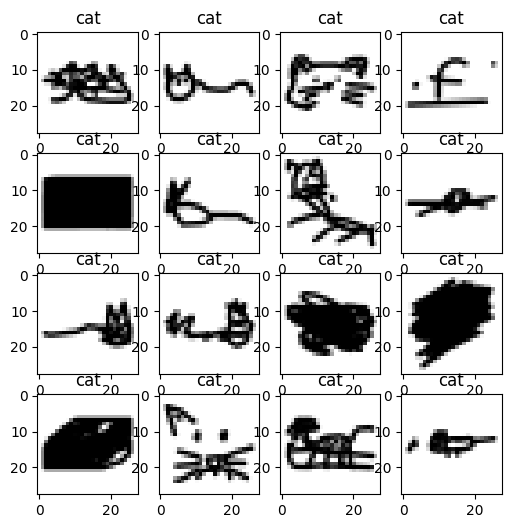

In [33]:
fig = plt.figure(figsize=(6, 6))
rows = 4 ; colums = 4

for x in range(1, rows * colums + 1):
    img = images_test[index[x - 1]].reshape(28, 28)
    fig.add_subplot(rows, colums, x)
    plt.title(classes[int(targets_test[index[x - 1]])])
    plt.imshow(img, cmap='gray')

In [44]:
np.set_printoptions(suppress=True, precision=6)
for ind in index[:10]:
    print(targets_pred[ind])

[0.009529 0.167414 0.551925 0.013966 0.005295 0.054287 0.06831  0.017704
 0.106285 0.005284]
[0.1496   0.156558 0.260474 0.064474 0.028199 0.132035 0.036728 0.066515
 0.09621  0.009207]
[0.00008  0.000096 0.811785 0.000007 0.000025 0.010249 0.002416 0.000178
 0.175105 0.000058]
[0.00001  0.037485 0.957473 0.000225 0.002525 0.001427 0.000034 0.00001
 0.00081  0.000001]
[0.060907 0.139345 0.290137 0.047356 0.046535 0.056327 0.087257 0.043706
 0.086434 0.141995]
[0.014987 0.047065 0.842683 0.001133 0.000461 0.089285 0.000309 0.001391
 0.002672 0.000014]
[0.009333 0.068094 0.72175  0.020711 0.00319  0.132392 0.006046 0.00078
 0.037118 0.000587]
[0.032803 0.101738 0.417858 0.03884  0.015822 0.060067 0.082718 0.01577
 0.218765 0.015619]
[0.16945  0.197102 0.305781 0.034883 0.009955 0.209705 0.031225 0.010007
 0.019305 0.012586]
[0.004236 0.024595 0.919831 0.004424 0.002041 0.004575 0.003111 0.004635
 0.030403 0.002148]


In [40]:
classes

['dog',
 'mosquito',
 'beach',
 'ant',
 'chair',
 'cat',
 'airplane',
 'banana',
 'river',
 'bus']

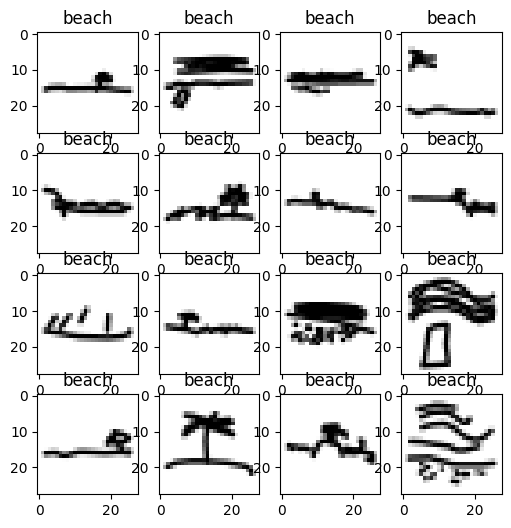

In [48]:
R = pd.DataFrame((targets_test == 2))
index = R[R[0] == True].index

fig = plt.figure(figsize=(6, 6))
rows = 4 ; colums = 4

for x in range(1, rows * colums + 1):
    img = images_test[index[x - 1]].reshape(28, 28)
    fig.add_subplot(rows, colums, x)
    plt.title(classes[int(targets_test[index[x - 1]])])
    plt.imshow(img, cmap='gray')